<a href="https://colab.research.google.com/github/pylabview/Logistic_Random_Forest_KNN/blob/main/Logistic_Random_Forest_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic, Random Forest, or KNN? (Core)

>Rodrigo Arguello-Serrano
- 01/15/23

<a name="TOC"></a>
#🗂  Table of Contents
1. [🖌 Source Control and Data Cleaning](#1)
  - [📒 Data Dictionary ](#1.1)
  - [Module Imports & Mounting Goolgle Drive](#1.2)
  - [Loading Data](#1.3)
  - [🧽 Data Cleaning](#1.4)
2. [⚙️ Preprocesing for Machine Learning](#5)
  - [Split the Data (Validation Split)](#5.3)
  - [Column Selector](#5.4)
  - [Transformers](#5.5)
  - [Pipeline Numeric Data and a Pipeline for Categorical Data](#5.6)
  - [Tuples](#5.7)
  - [ColumnTransformer & Preprocessing](#5.8)
3. [📐Maching Learning - Training the Models](#6)
  - [🐍 Functions](#6.1)
  - [▶ Model Data: LogisticRegression](#6.2)
    - [Fit a LogisticRegression model](#6.2.1)
    - [Evaluating Our Model](#6.2.2)
    - [Changing Decision Thresholds](#6.2.3)
    - [Comparing Confusion Matrices](#6.2.4)
    - [Loop Over Decision Thresholds](#6.2.5)
  - [▶ Model Data: KNN model](#6.3)
    - [Tune the Hyperparameters](#6.3.1)
  - [▶ Model Data: Ramdom Forest Model](#6.9)
    - [Loop to Tune n_estimators for Random Forest Regressor Model](#6.10)
4. [📕 Observations and Recommendations](#6.14)


<a name="1"></a>
# Source Control and Data Cleaning

⬅️[Go back to TOC](#TOC)

<a name="1.1"></a>
###📒 Data Dictionary

> Doesn't exist

<a name="1.2"></a>
## Module Imports & Mounting Goolgle Drive

In [ ]:
#Mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
##### Imports #####
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Plotting libs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector,
                             make_column_transformer)
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,precision_score,
                             f1_score, accuracy_score, classification_report)

<a name="1.3"></a>
## Loading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Data/wisconsinBreastCancer - wisconsinBreastCancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Display all columns
pd.set_option('display.max_column', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a name="1.4"></a>
## 🧽 Data Cleaning

In [ ]:
# 1) How many rows and columns?
num_cols,num_rows = df.shape
print(f"Number of Columns: {num_cols}, Number or rows: {num_rows}")

Number of Columns: 569, Number or rows: 32


In [ ]:
# 2) What are the datatypes of each variable?
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Are there duplicates? If so, drop any duplicates.
dups = df.duplicated().sum()
print(f"Number of duplicates: {dups}")

Number of duplicates: 0


In [ ]:
# 6) Confirm that there are no missing values after addressing them.
print(f"Are All missing values removed? {df.isna().sum().sum()==0}")

Are All missing values removed? True


In [ ]:
# 7) Find and fix any inconsistent categories of data
## Item_Fat_Content

df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

>There is not inconsistencies

In [ ]:
#Repalcing target clolum values: 'M'--> 1, 'B'-->0
df.replace({'M': 1,
            'B': 0,}, inplace = True)

In [ ]:
#Cheking everything is OK!

df['diagnosis'].unique()

array([1, 0])

In [ ]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<a name="5"></a>
# ⚙️ Preprocesing for Machine Learning

⬅️[Go back to TOC](#TOC)

In [ ]:
# Make a copy of original df to avoid any manipulations
ml_df = df.copy()

<a name="5.3"></a>
## Split the Data (Validation Split)

In [ ]:
X = ml_df.drop('diagnosis', axis=1).copy()
y = ml_df['diagnosis'].copy()

labels=['benign', 'malignant']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

<a name="5.4"></a>
## Column Selector

In [ ]:
## Make a column selector for categories & test it -sanity check
num_selector = make_column_selector(dtype_include='number')
##cat_sel = make_column_selector(dtype_include='object')

<a name="5.5"></a>
## Transformers

In [ ]:
# Instantiate the transformers
scaler = StandardScaler()

> No need for inputers as we don't have missing vales on the studied dataset

<a name="5.6"></a>
## Pipeline Numeric Data

⬅️[Go back to TOC](#TOC)

In [ ]:
num_pipeline = make_pipeline(scaler)

<a name="5.7"></a>
## **Tuples**

In [ ]:
# Create tuples
number_tuple = (num_pipeline, num_selector)

<a name="5.8"></a>
## ColumnTransformer & Preprocessing

In [ ]:
# Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple,
                                       remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2c64825df0>)])

<a name="6"></a>
# 📐Maching Learning - Training the Models

⬅️[Go back to TOC](#TOC)

<a name="6.1"></a>
## 🐍 Functions

  **Metrics for X_train**

  mae = mean_absolute_error(y_train, model_pipeline.predict(x_train))

  mse = mean_squared_error(y_train, model_pipeline.predict(x_train))

  rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(x_train)))

  r2 = r2_score(y_train, model_pipeline.predict(x_train))

**Metrics for X_test**

  mae = mean_absolute_error(y_test, model_pipeline.predict(x_test))

  mse = mean_squared_error(y_test, model_pipeline.predict(x_test))

  rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(x_test)))

  r2 = r2_score(y_test, model_pipeline.predict(x_test))

In [ ]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, x_train, y_train, x_test, y_test,
                       model_name='Regression Model', ):
  # Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

  # Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

>evaluate_classiffication Function<br>


- Let's combine the model evaluation steps for classification models into a new function called `evaluate_classification`.

- The function should have the following arguments:
  - model
  - X_test
  - y_test
  - + any other plot customization options.

- Inside the function, it will:
  - Print a header with a label indicating if we are evaluating Training Data or Test data.

  - Get the predictions for X_test from the model.
  - Get and print a classification_report
  - Create a figure with 2 subplots:
    - a Confusion Matrix
    - a ROC Curve Display




In [ ]:
def evaluate_classiffication(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens'):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get Predictions
    y_pred = model.predict(X_test)

   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()


<a name="6.2"></a>
## ▶ Model Data: LogisticRegression

⬅️[Go back to TOC](#TOC)

<a name="6.2.1"></a>
### Fit a LogisticRegression model

In [ ]:
# fit model
lgr_pipe = make_pipeline(preprocessor, LogisticRegression())
lgr_pipe.fit(X_train, y_train)

# get predictions
train_preds = lgr_pipe.predict(X_train)
test_preds = lgr_pipe.predict(X_test)

train_preds[:5]

NameError: ignored

<a name="6.2.2"></a>
### Evaluating Our Model

In [ ]:
# print the classiffication report from the test data
print(classification_report(y_test, test_preds, target_names=labels ))

              precision    recall  f1-score   support

      benign       0.97      0.97      0.97        90
   malignant       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



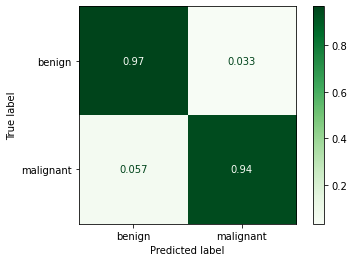

In [ ]:
# create a confusion matrix with the test data
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
               normalize='true', display_labels=labels, cmap='Greens');

<a name="6.2.3"></a>
### Changing Decision Thresholds

⬅️[Go back to TOC](#TOC)

In [ ]:
# Get the predicted probabilities instead of predicted classes
train_probs = lgr_pipe.predict_proba(X_train)
test_probs = lgr_pipe.predict_proba(X_test)

train_probs[:5]

array([[1.61928821e-06, 9.99998381e-01],
       [9.99912147e-01, 8.78528505e-05],
       [3.41889184e-10, 1.00000000e+00],
       [9.89770906e-01, 1.02290940e-02],
       [5.06064149e-04, 9.99493936e-01]])

- What if we used a probability threshold of 0.4 instead of the default (0.5)?

In [ ]:
thresh = 0.40

# use list comprehension to apply threshold to 2nd value in each prediction
train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

print(f'Predictions with the default decision threshold of .5')
print(train_preds[:5], '\n')

print(f'Predictions with a decision threshold of {thresh}')
print(train_thresh[:5], '\n')

print('True Labels')
print(y_train[:5].values)

Predictions with the default decision threshold of .5
[1 0 1 0 1] 

Predictions with a decision threshold of 0.4
[1, 0, 1, 0, 1] 

True Labels
[1 0 1 0 1]


⬅️[Go back to TOC](#TOC)

<a name="6.2.4"></a>
### Comparing Confusion Matrices

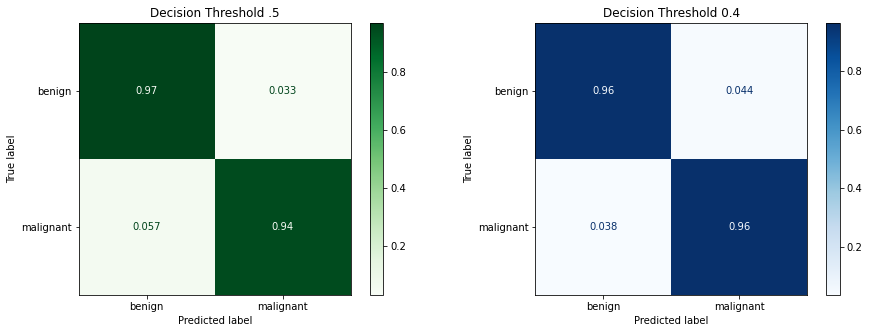

In [ ]:
# plot confusion matrix for both .5 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
               normalize='true', display_labels=labels,  cmap='Greens',
               ax=axes[0])
axes[0].set_title('Decision Threshold .5')


ConfusionMatrixDisplay.from_predictions(y_test, test_thresh,
               normalize='true', display_labels=labels,  cmap='Blues',
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {thresh}');

<a name="6.2.5"></a>
### Loop Over Decision Thresholds

⬅️[Go back to TOC](#TOC)

- Let's check our model's accuracy for 20 different probabiltiy thresholds and compare.

In [ ]:
# Create an array of 20 thesholds to use
thresholds = np.array(range(0,105,5)) / 100
thresholds[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Text(0, 0.5, 'Accuracy Score')

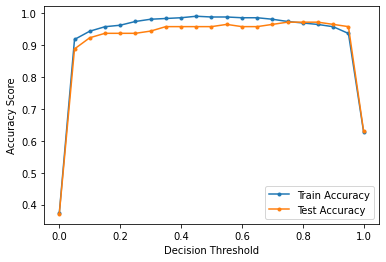

In [ ]:

score_df = pd.DataFrame(index=thresholds, columns=['Train Accuracy','Test Accuracy'])

## for each threshold:
for thresh in thresholds:

  ## Get the predicted classes for training and test data
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  ## Save the Training and test accuracy scores to the score_df
  score_df.loc[thresh, 'Train Accuracy'] = accuracy_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Accuracy'] = accuracy_score(test_thresh, y_test)


## Plot the results
score_df.plot(marker='.')
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy Score')

In [ ]:
df['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [ ]:
score_df.sort_values(by='Test Accuracy', ascending=False)

,Train Accuracy,Test Accuracy
0.85,0.964789,0.972028
0.80,0.969484,0.972028
0.75,0.974178,0.972028
0.90,0.957746,0.965035
0.70,0.981221,0.965035
0.55,0.988263,0.965035
0.95,0.93662,0.958042
0.65,0.985915,0.958042
0.60,0.985915,0.958042
0.50,0.988263,0.958042


> Best Accuracy performance @ 0.85
<br>
   - Train: 0.964789
   - Test: 0.972028
>

<a name="6.3"></a>
##▶ Model Data: KNN Model

⬅️[Go back to TOC](#TOC)

In [ ]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(scaler, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



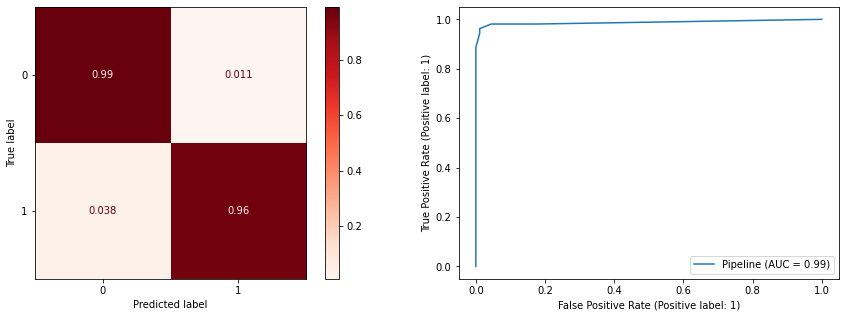

In [ ]:
# fit and evaluate a KNeighborsClassifier
evaluate_classiffication(knn_pipe,X_test,y_test, cmap='Reds',
                         label='KNN - Test Data')

<a name="6.3.1"></a>
### **Tune the Hyperparameters**

In [ ]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
# Tune K utilizing a loop.
krange = range(1, 15)
k_list = []
for k in krange:
  knn_pipe = make_pipeline(KNeighborsClassifier(n_neighbors=k))
  knn_pipe.fit(X_train, y_train)
  score = accuracy_score(y_test, knn_pipe.predict(X_test))
  k_list.append(score)

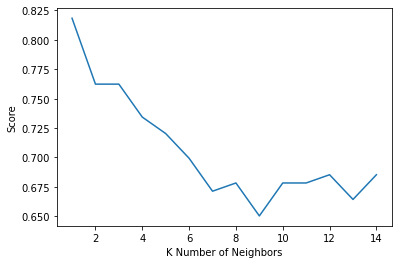

In [ ]:
# Visualize Accuracy Scores.
plt.plot(krange, k_list)
plt.xlabel('K Number of Neighbors')
plt.ylabel('Score');

⬅️[Go back to TOC](#TOC)

In [ ]:
# Create an instance of the best model
knn = KNeighborsClassifier(n_neighbors=1)
# Create a model pipeline
knn_pipe = make_pipeline(scaler, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



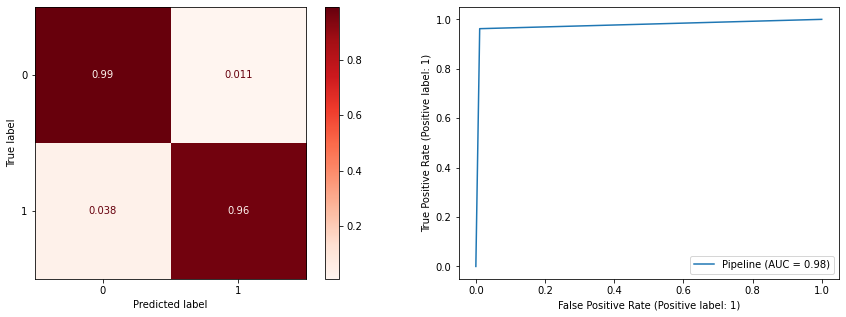

In [ ]:
# fit and evaluate a KNeighborsClassifier Test
evaluate_classiffication(knn_pipe,X_test,y_test, cmap='Reds',
                         label='KNN - Test Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: KNN - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



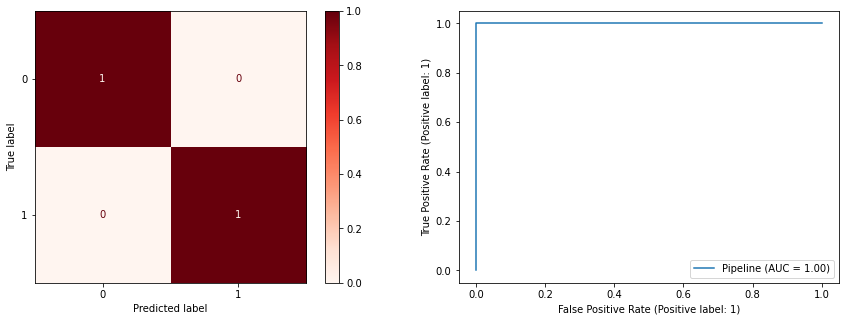

In [ ]:
# fit and evaluate a KNeighborsClassifier for Train
evaluate_classiffication(knn_pipe,X_train,y_train, cmap='Reds',
                         label='KNN - Train Data')

<a name="6.9"></a>
##▶ Model Data: Ramdom Forest Model

⬅️[Go back to TOC](#TOC)

In [ ]:
# Create an instance of the model
rdf = RandomForestClassifier()
# Create a model pipeline
rdf_pipe = make_pipeline(scaler, rdf)
# Fit the model
rdf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
# Save the model's predictions for the train dataset
rdf_train_preds = rdf_pipe.predict(X_train)
# Save the model's predictions for the test dataset
rdf_test_preds = rdf_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



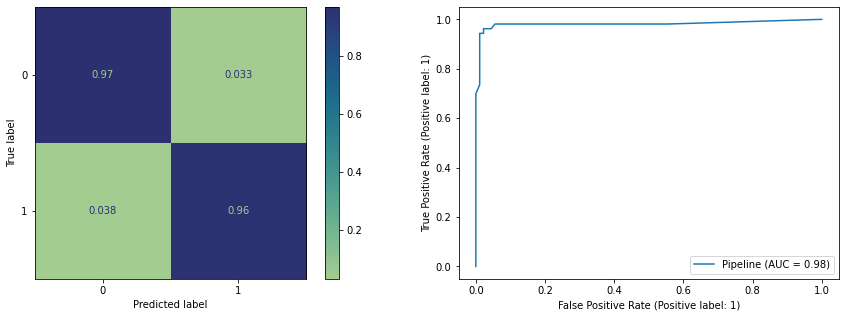

In [ ]:
# fit and evaluate a Random Forest Test Data
evaluate_classiffication(rdf_pipe,X_test,y_test, cmap='crest',
                         label='Random Forest - Test Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



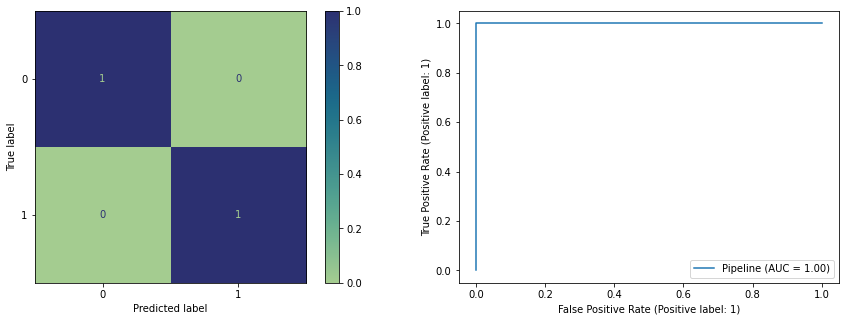

In [ ]:
# fit and evaluate a Random Forest Test Data
evaluate_classiffication(rdf_pipe,X_train,y_train, cmap='crest',
                         label='Random Forest - Train Data')

<a name="6.10"></a>
### Loop to Tune n_estimators for Random Forest Regressor Model

In [ ]:
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 3000, 4000, 5000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestClassifier(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)

  #fit the model
  rf_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [ ]:
scores

,Train,Test
50,1.0,0.820126
100,1.0,0.850105
200,1.0,0.850105
300,1.0,0.850105
400,1.0,0.850105
500,1.0,0.850105
600,1.0,0.850105
700,1.0,0.850105
800,1.0,0.850105
1000,1.0,0.850105


⬅️[Go back to TOC](#TOC)

In [ ]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

100

In [ ]:
# Create an instance of the model
best_rdf = RandomForestClassifier(n_estimators= best_estimators)
# Create a model pipeline
best_rdf_pipe = make_pipeline(scaler, best_rdf)
# Fit the model
best_rdf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
# Save the model's predictions for the train dataset
best_rdf_train_preds = best_rdf_pipe.predict(X_train)
# Save the model's predictions for the test dataset
bets_rdf_test_preds = best_rdf_pipe.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best N-Estimator - Random Forest - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



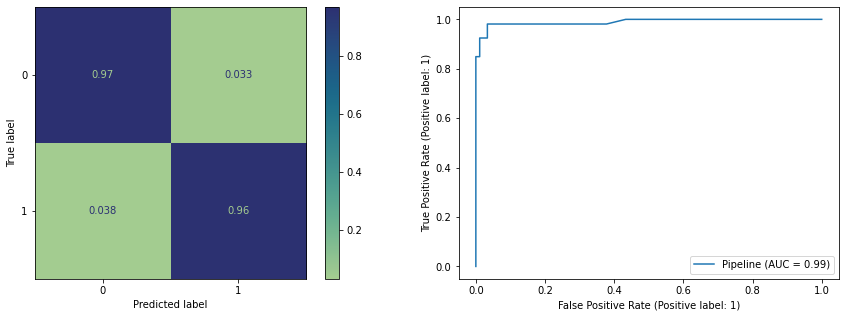

In [ ]:
# fit and evaluate a Random Forest Test Data for Best N-Estimator
evaluate_classiffication(best_rdf_pipe,X_test,y_test, cmap='crest',
                         label='Best N-Estimator - Random Forest - Test Data')

⬅️[Go back to TOC](#TOC)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Best N-Estimator - Random Forest - Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



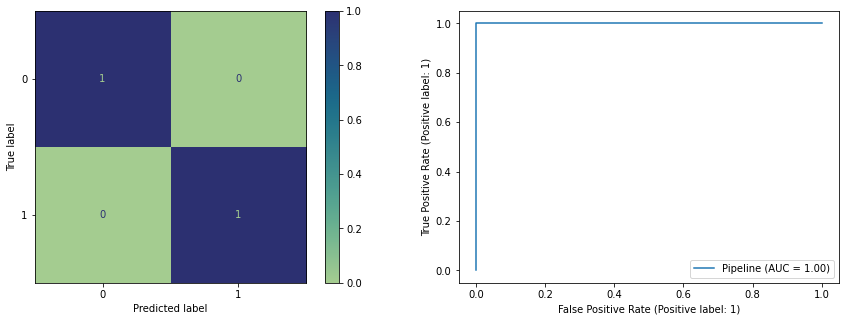

In [ ]:
# fit and evaluate a Random Forest Train Data for Best N-Estimator
evaluate_classiffication(best_rdf_pipe,X_train,y_train, cmap='crest',
                         label='Best N-Estimator - Random Forest - Train Data')

<a name="6.14"></a>
## 📕 Observations and Recommendations

> Hyperparameters used for tuning:
  - Logistic Regression Model: Decision Threshold
  - KNN Model: n_neighbors
  - Random Forrest:n_estimators

> The best Model was the KNN, and it is recommended to use in production

> False Negative is the worst case, implying that a patient with cancer could miss treatment. Other business considerations could assume the False Posite relevant, as could put a patient under unnecessary costly treatment  